In [35]:
import sqlite3
import numpy as np
from numpy import ma
import matplotlib.pyplot as plt
%matplotlib inline


bd = sqlite3.connect('velib2.db')

c = bd.cursor()
c.execute("select * from station_dyn where num = 10115 and \
db_write_time >= ('13/03/2017') and db_write_time < ('20/03/2017')  order by last_update" )

x=[]
bike=[]
#place=[]
in_flow=[]
out_flow=[]
from datetime import datetime
#import time
#now = time.localtime(time.time())
#print time.strftime("%d/%m/%Y-%H:%M:%S", now)

for line in c:
    #print line[5]
    #print datetime.strptime(line[5], "%d/%m/%Y-%H:%M:%S")

    x.append(datetime.strptime(line[5], "%d/%m/%Y-%H:%M:%S"))
    #place.append(line[2])
    bike.append(line[3])
    
c.close()


sum_in_flow, sum_out_flow = 0,0
in_flow.append(-999)
out_flow.append(-999)

for i in range(len(place)-1):
    flow=bike[i+1]-bike[i]
    if flow>0:
        sum_in_flow += flow
    elif flow<0:
        sum_out_flow += flow
    #in_flow.append(if flow>0 flow else 0)
    in_flow.append(sum_in_flow)# if flow>0 else 0)
    out_flow.append(sum_out_flow)# if flow<0 else 0)

for i in range(0,40):
    print [bike[i],in_flow[i],out_flow[i], bike[i]-in_flow[i]-out_flow[i]]


[26, -999, -999, 2024]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[27, 1, 0, 26]
[25, 1, -2, 26]
[25, 1, -2, 26]
[24, 1, -3, 26]
[23, 1, -4, 26]
[23, 1, -4, 26]
[22, 1, -5, 26]


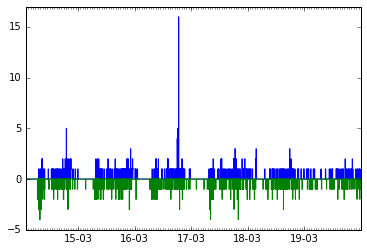

In [238]:
import matplotlib.dates as mdates

in_flow=[]
out_flow=[]
in_flow.append(0)
out_flow.append(0)

for i in range(len(place)-1):
    flow=bike[i+1]-bike[i]
    in_flow.append(flow if flow>0 else 0)
    out_flow.append(flow if flow<0 else 0)


plt.xlim([min(x), max(x)])
plt.ylim([min(out_flow)-1, max(in_flow)+1])

plt.step(x, in_flow, label='flux entrant')
plt.step(x, out_flow, label='flux sortant')


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_minor_locator(mdates.HourLocator())

#plt.set_major_formatter(dayFormatter)

#Exemple de rechargement : station 10115 le 16/03/17 à 18h43

plt.show()

In [249]:
import sqlite3

bd = sqlite3.connect('velib2.db')

c = bd.cursor()
c.execute("select DISTINCT num from station_dyn" )

list_station=[]
list_station_row=[]
#list_station_row_time=[]



for row in c:
    list_station.append(row)

#print (list_station)
    
for st in list_station:
    #print str(st[0])
    c.execute("select count(*) from station_dyn where num = "+str(st[0]))
    #print c.fetchone()[0]
    list_station_row.append(c.fetchone()[0])

#print "mini",min(list_station_row)

"""i=0
for row in list_station_row:
    #print row
    if row == 27:
        print "mini =", list_station[i]
    #if list_station_row[st][0] == 27:
    #    print "mini =", list_station[st]
    i+=1
print "********" """


for station in range(2):#len(list_station)):
    print list_station[station][0]
    print list_station_row[station]
    #c.execute("select db_write_time,nb_velo_dispo from station_dyn where num = "+str(list_station[station][0])+" order by last_update ")
    c.execute("select last_update_date,  nb_velo_dispo from station_dyn where num = "+str(list_station[station][0])+" order by last_update_date ")
    
    
    list_station_row_time=[]
    for transac in c:#range(list_station_row[station]-1)
        #print transac
        list_station_row_time.append(transac)
    #print list_station_row_time
    time = []
    #time.append(list_station_row_time[0][0])
    time.append([0,datetime.strptime(list_station_row_time[0][0], "%Y-%m-%d %H:%M:%S"),"####"])
    #print 0, list_station_row_time[0][0],"####"
    for i in range(1,list_station_row[station]):
        if list_station_row_time[i-1][1]==list_station_row_time[i][1]:
            continue
        #print i, list_station_row_time[i][0],datetime.strptime(list_station_row_time[i][0], "%d/%m/%Y-%H:%M:%S")-datetime.strptime(list_station_row_time[i-1][0], "%d/%m/%Y-%H:%M:%S")
        
        #print datetime.strptime(list_station_row_time[i][0], "%Y-%m-%d %H:%M:%S")
        
        #print list_station_row_time[i][0]
        
        #print i, list_station_row_time[i][0],datetime.strptime(list_station_row_time[i][0], "%Y-%m-%d %H:%M:%S")-datetime.strptime(list_station_row_time[i-1][0], "%Y-%m-%d %H:%M:%S")
        
        #rint i, list_station_row_time[i][0],datetime.strptime(list_station_row_time[i][0], "%Y-%m-%d %H:%M:%S")-datetime.strptime(list_station_row_time[i-1][0], "%Y-%m-%d %H:%M:%S"),time[-1]#,datetime.strptime(time[-1], "%Y-%m-%d %H:%M:%S")
        
        #time.append(datetime.strptime(list_station_row_time[i][0], "%d/%m/%Y-%H:%M:%S")-datetime.strptime(list_station_row_time[i-1][0], "%d/%m/%Y-%H:%M:%S"))
        #time.append(datetime.strptime(list_station_row_time[i][0], "%Y-%m-%d %H:%M:%S")-datetime.strptime(list_station_row_time[i-1][0], "%Y-%m-%d %H:%M:%S"))

        #print time[-1][1]
        #print datetime.strptime(list_station_row_time[i][0], "%Y-%m-%d %H:%M:%S")-datetime.strptime(time[-1][1], "%Y-%m-%d %H:%M:%S")
        #break
        
        time.append([i,datetime.strptime(list_station_row_time[i][0], "%Y-%m-%d %H:%M:%S"),datetime.strptime(list_station_row_time[i][0], "%Y-%m-%d %H:%M:%S")-time[-1][1]])
        
        flux = abs(list_station_row_time[i-1][1]-list_station_row_time[i][1])
        if 1 < flux < 5:
            for 
        
        
        #print time[-1]
        
        #print list_station_row[list_station[station]]
     #   c.execute("select last_update_date from station_dyn where num = "+st)
  
    #break
    for i in range(len(time)):
        print time[i][0],time[i][1],time[i][2]
        #print time[i][:]

    """Sauvegarder dans time le couple (list_station_row_time[i][0],
    datetime.strptime(list_station_row_time[i][0], "%Y-%m-%d %H:%M:%S")-datetime.strptime(list_station_row_time[i-1][0], "%Y-%m-%d %H:%M:%S"))
    afin de pouvoir retrouver la date de la précédente transaction et extraire le Delta """
    
c.close()

mini = (12006,)
********
901
1820
0 2017-03-14 01:53:32 ####
10 2017-03-14 03:26:09 1:32:37
36 2017-03-14 07:28:21 4:02:12
39 2017-03-14 07:57:16 0:28:55
40 2017-03-14 08:07:41 0:10:25
42 2017-03-14 08:14:14 0:06:33
45 2017-03-14 08:31:50 0:17:36
47 2017-03-14 08:36:25 0:04:35
49 2017-03-14 08:45:27 0:09:02
50 2017-03-14 08:54:58 0:09:31
53 2017-03-14 09:13:28 0:18:30
54 2017-03-14 09:14:35 0:01:07
65 2017-03-14 10:21:41 1:07:06
70 2017-03-14 10:42:26 0:20:45
71 2017-03-14 10:44:06 0:01:40
74 2017-03-14 10:46:38 0:02:32
75 2017-03-14 10:49:29 0:02:51
77 2017-03-14 10:58:18 0:08:49
78 2017-03-14 11:01:16 0:02:58
103 2017-03-14 13:08:01 2:06:45
104 2017-03-14 13:09:20 0:01:19
115 2017-03-14 14:19:19 1:09:59
116 2017-03-14 14:19:40 0:00:21
126 2017-03-14 14:46:22 0:26:42
127 2017-03-14 14:46:54 0:00:32
128 2017-03-14 14:55:45 0:08:51
132 2017-03-14 15:19:55 0:24:10
134 2017-03-14 15:33:10 0:13:15
135 2017-03-14 15:41:53 0:08:43
137 2017-03-14 15:50:32 0:08:39
139 2017-03-14 16:02:20 0:11: